# SF-DAT-21 | Unit Project 2

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

### Step 1: Load the python libraries you will need for this project

In [1]:
# imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
%matplotlib inline

### Step 2: Read in your data set

In [2]:
# read in data from source
df_raw = pd.read_csv("../../dataset/admissions.csv")
print df_raw.head()

   admit  gre   gpa  prestige
0      0  380  3.61         3
1      1  660  3.67         3
2      1  800  4.00         1
3      1  640  3.19         4
4      0  520  2.93         4


## Questions
#### Question 1. How many observations are in our dataset?


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table.

In [4]:
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: Because typical GRE values are 2 orders of magnitude greater than GPA, thus the standard deviation is correspondingly larger as well.

#### Question 4. Drop data points with missing data.


In [12]:
df_clean = df_raw.dropna()

#### Question 5. Confirm that you dropped the correct data.  How can you tell?

Answer: df_clean.count() totals and len(df_clean) are both 397.

#### Question 6. Create box plots for GRE and GPA.

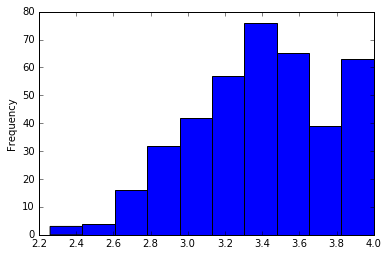

In [27]:
df_clean['gpa'].plot(kind="hist")

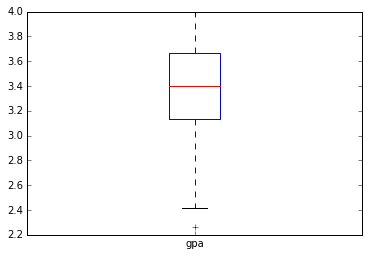

In [14]:
df_clean.gpa.plot.box()

#### Question 7. What do this plots show?

Answer: GRE mean is under 600 and the blue box covers 50% of the data between 500ish and 650. GPA mean is 3.4 and the box covers 3.2 to 3.7. There are no outliars beyond the top range in either because the max values are within the IQR range.

#### Question 8. Describe each distribution.

In [25]:
df_clean[['gpa', 'gre']].describe()

,gpa,gre
count,397.000000,397.000000
mean,3.392242,587.858942
std,0.380208,115.717787
min,2.260000,220.000000
25%,3.130000,520.000000
50%,3.400000,580.000000
75%,3.670000,660.000000
max,4.000000,800.000000


#### Question 9. If our model had an assumption of a normal distribution would we meet that requirement?

Answer: No

#### Question 10. Does this distribution need correction?  If so, why?  How?

Answer: Yes, because the tail for the upper quartile of the distribution is squished. Students can't get more than 100% on a quiz. To correct for this we can factor out the missing tail of the distribution.

#### Question 11. Which of our variables are potentially colinear?

In [28]:
df_clean.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: The strongest correlation is between GRE and GPA, which makes sense since they are both measuring academic proficiency. The next strongest is the negative correlation between admission and prestige of the candidate school. This means that higher prestige indicates less of a chance of gaining admission.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of undergraduate schools.

Answer: We would do a plot of the data and a logistic regression analysis. Look for more data sources with extended information on candidates where confounding factors may reveal themselves.

#### Question 14. What is your hypothesis?

Answer: Based on the fact the correlation is negative, we expect as the prestige of the school increases, the less likely the candidate will be admitted.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data.

Answer: Fill in with the mean or randomly select mode values for the column.

#### 2. Bonus: Log transform the skewed data.

Answer: 

#### 3. Advanced: Impute missing data.